In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\austi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [4]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [5]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

data = raw.drop(columns=dropping)

### Lists of data sections for future column selection

In [6]:
activities = ["sports", "tvsports", "exercise", "dining", "museums","art", "hiking", 
              "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

ratings_of_partner = ["attr", "intel", "fun", "amb","shar", "like", "prob", "met"]
ratings_from_partner = ["attr_o", "intel_o", "fun_o", "amb_o","shar_o", 
                        "like_o", "prob_o", "met_o"]

importance = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
partners_importance = ["pf_o_attr", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb","pf_o_shar"]

In [80]:
real_num = dict()

for index, row in data.iterrows():
    iid = int(row["iid"])    
    if iid not in real_num:
        real_num[iid] = 0
    real_num[iid] += row["dec_o"]

In [81]:
people["real"] = pd.DataFrame([real_num]).T

In [83]:
people["real_perc"] = people["real"] / people["round"]

In [85]:
people["diff"] = people["real_perc"] - people["exp_perc"]

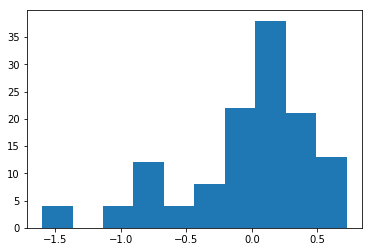

In [122]:
plt.hist(people["diff"].values.astype(np.float64))
plt.show()

In [192]:
wave_matches = dict()
rounds = dict()

for index, row in data.iterrows():
    try:
        wave_matches[row["wave"]] += row["match"]
    except KeyError:
        wave_matches[row["wave"]] = row["match"]
    
    try:
        rounds[row["wave"]].update([row["round"]])
    except KeyError:
        rounds[row["wave"]] = set([row["round"]])
print(rounds)
for wave in wave_matches:
    r = list(rounds[wave])
    if len(w) == 1:
        rounds[wave] = r[0]**2
    elif len(w) == 2:
        rounds[wave] = r[0] * r[1]
    else:
        print("uh oh")
        break
    wave_matches[wave] /= 2

In [202]:
total_matches = list(wave_matches.values())

In [203]:
rounds.values()

dict_values([100, 256, 100, 324, 100, 25, 256, 100, 400, 81, 441, 196, 81, 324, 324, 64, 121, 36, 225, 36, 484])

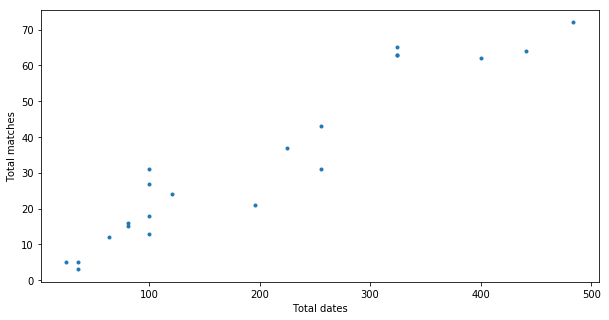

In [208]:
plt.figure(figsize=(10,5))
plt.plot(list(rounds.values()), total_matches, '.')
plt.xlabel("Total dates")
plt.ylabel("Total matches")
plt.show()